In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [8]:
wards=gpd.read_file("C:\\hackathon\\base data\\NEPAL_WARDS.shp")

In [9]:
wards.to_crs('EPSG:4326',inplace=True)

In [10]:
residence=gpd.read_file("C:\\hackathon\\points\\points.shp")
residence.to_crs('EPSG:4326',inplace=True)

In [11]:
# residence=gpd.read_file("C:\\hackathon\\pokhara_buildings\\buildings_pkr.shp")
# residence.to_crs('EPSG:4326',inplace=True)

In [80]:
gravel_road=gpd.read_file("C:\\hackathon\\base data\\\Gravelled_Road.shp")
gravel_road.to_crs('EPSG:4326',inplace=True)

In [12]:
foot_path=gpd.read_file("C:\\hackathon\\base data\\Foot_Path.shp")
foot_path.to_crs('EPSG:4326',inplace=True)

In [13]:
highway=gpd.read_file("C:\\hackathon\\base data\\Highway.shp")
highway.to_crs('EPSG:4326',inplace=True)

In [82]:
gravel_road.drop(columns=['FNODE_','TNODE_','LPOLY_','RPOLY_','LENGTH','ROAD_DD_','ROAD_DD_ID'],inplace=True)

In [83]:
gravel_road

,TYPE,geometry
0,Gravelled,"LINESTRING (80.42972 29.55312, 80.43727 29.551..."
1,Gravelled,"LINESTRING (80.58334 29.45729, 80.58369 29.458..."
2,Gravelled,"LINESTRING (80.47308 29.52590, 80.47505 29.523..."
3,Gravelled,"LINESTRING (80.59379 29.46265, 80.59517 29.462..."
4,Gravelled,"LINESTRING (80.61910 29.44301, 80.62009 29.442..."
...,...,...
525,Gravelled,"LINESTRING (82.67724 28.20019, 82.68291 28.200..."
526,Gravelled,"LINESTRING (82.72617 28.24944, 82.72526 28.251..."
527,Gravelled,"LINESTRING (81.65870 28.56908, 81.65244 28.565..."
528,Gravelled,"LINESTRING (81.64830 28.57157, 81.64314 28.574..."


In [85]:
foot_path.drop(columns=['FNODE_', 'TNODE_', 'LPOLY_', 'RPOLY_', 'LENGTH', 'ROAD_DD_',
       'ROAD_DD_ID'],inplace=True)

In [87]:
highway.drop(columns=['FNODE_', 'TNODE_', 'LPOLY_', 'RPOLY_', 'LENGTH', 'ROAD_DD_',
       'ROAD_DD_ID'],inplace=True)

In [92]:
newdict={}

In [94]:
type_list=[]
geometry_list=[]
for i in gravel_road['TYPE'].tolist():
    type_list.append(i)
for j in gravel_road['geometry'].tolist():
    geometry_list.append(j)

In [95]:
for i in foot_path['TYPE'].tolist():
    type_list.append(i)
for j in foot_path['geometry'].tolist():
    geometry_list.append(j)

In [96]:
for i in highway['TYPE'].tolist():
    type_list.append(i)
for j in highway['geometry'].tolist():
    geometry_list.append(j)

In [97]:
newdict['TYPE']=type_list
newdict['geometry']=geometry_list

In [102]:
road_network=gpd.GeoDataFrame(newdict,crs='EPSG:4326')

In [14]:
river=gpd.read_file("C:\\hackathon\\base data\\River.shp")
river.to_crs('EPSG:4326',inplace=True)

In [15]:
gravel=gpd.read_file("C:\\hackathon\\base data\\Gravelled_Road.shp")
gravel.to_crs('EPSG:4326',inplace=True)

<Axes: >

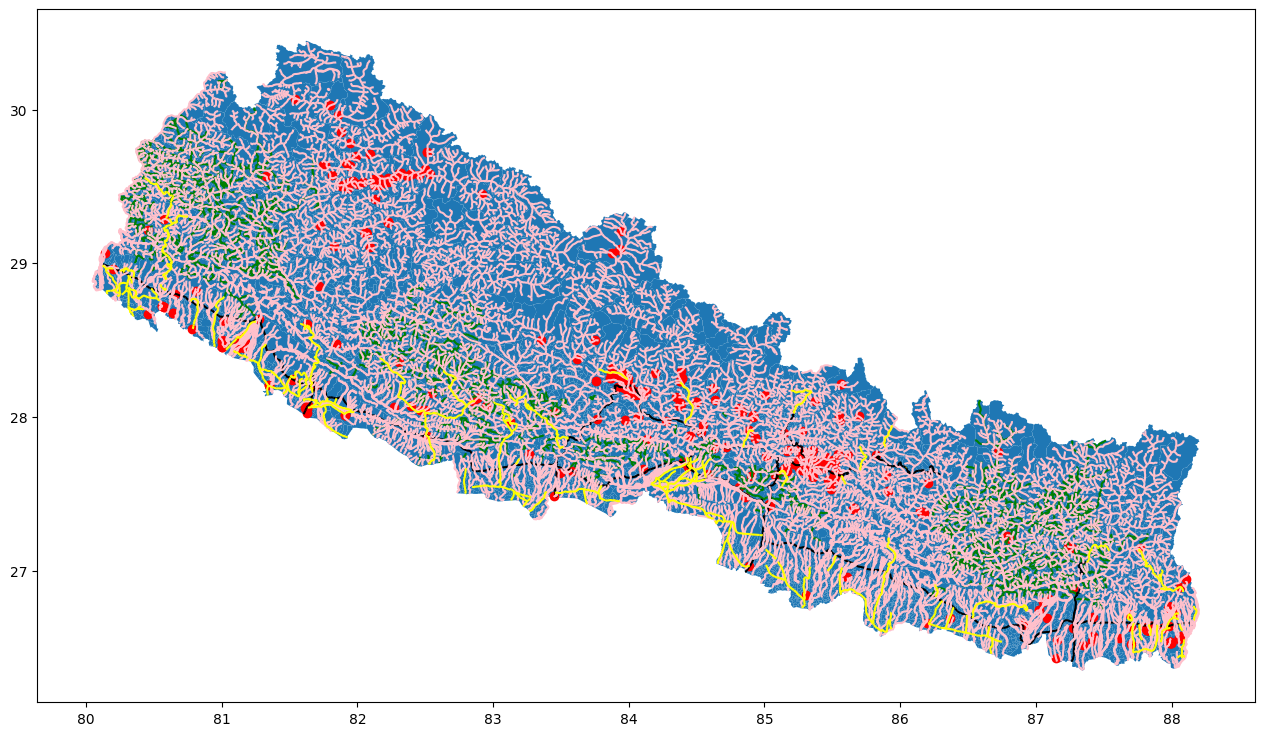

In [16]:
fig,ax=plt.subplots(figsize=(16,9))
wards.plot(ax=ax)
residence.plot(color='red',ax=ax)
foot_path.plot(color='green',ax=ax)
highway.plot(color='black',ax=ax)
river.plot(color='pink',ax=ax)
gravel.plot(color='yellow',ax=ax)

In [17]:
residence

,FID,geometry
0,0,POINT (85.32846 27.71433)
1,1,POINT (83.94034 29.20714)
2,2,POINT (83.93374 29.09254)
3,3,POINT (83.87296 29.06404)
4,4,POINT (83.92746 29.08772)
...,...,...
686,686,POINT (81.90706 28.01343)
687,687,POINT (85.30877 26.84037)
688,688,POINT (83.12586 27.97190)
689,689,POINT (85.43963 27.66984)


In [18]:
wards.drop(columns=['OBJECTID'],inplace=True)

In [19]:
len(wards['DCODE'].unique())

77

In [20]:
wards['DAS'].unique()

array([0, 1, 4, 6, 2], dtype=int64)

In [21]:
wards.columns

Index(['DCODE', 'DISTRICT', 'DAN', 'DAS', 'GaPa_NaPa', 'Type_GN', 'GN_CODE',
       'NEW_WARD_N', 'DDGNWW', 'CENTER', 'STATE_CODE', 'DDGN', 'Area_SQKM',
       'Shape_Leng', 'Shape_Area', 'geometry'],
      dtype='object')

In [22]:
wards['GN_CODE'].unique()

array([ 5.,  3.,  2.,  1.,  4.,  6., 10.,  9.,  7.,  8., 99., 12., 11.,
       13., 17., 14., 18., 16., 15., 19., 20.])

In [23]:
wards['Type_GN'].unique()

array(['Nagarpalika', 'Gaunpalika', 'National Park', 'Hunting Reserve',
       'Mahanagarpalika', 'Upamahanagarpalika', 'Wildlife Reserve',
       'Watershed and Wildlife Reserve', 'Development Area',
       'Wieldlife Reserve'], dtype=object)

In [24]:
wards.drop(columns=['DAN','DAS','GN_CODE','DDGNWW','CENTER','DDGN'],inplace=True)

In [25]:
wards.drop(columns=['Area_SQKM','Shape_Leng','Shape_Area'],inplace=True)

In [26]:
wards

,DCODE,DISTRICT,GaPa_NaPa,Type_GN,NEW_WARD_N,STATE_CODE,geometry
0,51,ARGHAKHANCHI,Sandhikharka,Nagarpalika,9,5,"POLYGON ((83.12196 28.02260, 83.12190 28.02263..."
1,51,ARGHAKHANCHI,Sandhikharka,Nagarpalika,10,5,"POLYGON ((83.13392 28.01980, 83.13369 28.01968..."
2,51,ARGHAKHANCHI,Malarani,Gaunpalika,1,5,"POLYGON ((83.17563 28.02946, 83.17559 28.02956..."
3,51,ARGHAKHANCHI,Chhatradev,Gaunpalika,8,5,"POLYGON ((83.20291 28.07246, 83.20293 28.07244..."
4,51,ARGHAKHANCHI,Malarani,Gaunpalika,2,5,"POLYGON ((83.19037 28.06661, 83.19039 28.06645..."
...,...,...,...,...,...,...,...
6798,33,BARA,Jitpur Simara,Upamahanagarpalika,18,2,"POLYGON ((85.06899 27.13979, 85.06900 27.13887..."
6799,33,BARA,Kolhabi,Nagarpalika,11,2,"POLYGON ((85.15834 27.07016, 85.15876 27.07013..."
6800,33,BARA,Kolhabi,Nagarpalika,5,2,"MULTIPOLYGON (((85.13532 27.08310, 85.13568 27..."
6801,33,BARA,Jitpur Simara,Upamahanagarpalika,9,2,"POLYGON ((84.95275 27.11323, 84.95251 27.11255..."


In [27]:
first_point=residence['geometry'][0]

In [28]:
#finding points lies in which state,district,ward number and nagarpalika
new_list=[]
for index,value in enumerate(wards['geometry']):
    for j,i in enumerate(residence['geometry']):
        point=i
        if value.contains(point)==True:
            newdict={}
            newdict['DCODE']=wards.loc[index,'DCODE']
            newdict['DCODE']=wards.loc[index,'DCODE']
            newdict['DISTRICT']=wards.loc[index,'DISTRICT']
            newdict['GaPa_NaPa']=wards.loc[index,'GaPa_NaPa']
            newdict['Type_GN']=wards.loc[index,'Type_GN']
            newdict['WARD_NO']=wards.loc[index,'NEW_WARD_N']
            newdict['STATE_CODE']=wards.loc[index,'STATE_CODE']
            newdict['geometry']=i
            new_list.append(newdict)

In [29]:
points_with_info=gpd.GeoDataFrame(new_list,crs='EPSG:4326')

In [30]:
points_with_info

,DCODE,DISTRICT,GaPa_NaPa,Type_GN,WARD_NO,STATE_CODE,geometry
0,51,ARGHAKHANCHI,Sandhikharka,Nagarpalika,3,5,POINT (83.12586 27.97190)
1,68,BAJHANG,Masta,Gaunpalika,7,7,POINT (81.32576 29.56877)
2,10,BHOJPUR,Arun,Gaunpalika,6,1,POINT (87.24393 27.15125)
3,10,BHOJPUR,Arun,Gaunpalika,6,1,POINT (87.24050 27.15150)
4,10,BHOJPUR,Arun,Gaunpalika,6,1,POINT (87.26566 27.14343)
...,...,...,...,...,...,...,...
686,4,JHAPA,Shivasataxi,Nagarpalika,8,1,POINT (87.81863 26.61758)
687,4,JHAPA,Shivasataxi,Nagarpalika,8,1,POINT (87.81864 26.61753)
688,4,JHAPA,Shivasataxi,Nagarpalika,8,1,POINT (87.81867 26.61754)
689,73,DADELDHURA,Alital,Gaunpalika,3,7,POINT (80.45911 29.21539)


In [31]:
d_codes={}
for i,j in zip(wards['DCODE'],wards['DISTRICT']):
    if j in d_codes.keys():
        pass
    else:
        d_codes[j]=i

In [32]:
district_codes=pd.DataFrame({'DISTRICTS':list(d_codes.keys()),'DCODE':list(d_codes.values())})

In [33]:
district_codes

,DISTRICTS,DCODE
0,ARGHAKHANCHI,51
1,BAITADI,74
2,BAJHANG,68
3,BAJURA,67
4,BHOJPUR,10
...,...,...
72,KANCHANPUR,72
73,JHAPA,4
74,DHANUSHA,17
75,DADELDHURA,73


In [34]:
district_codes.to_csv("C:\\hackathon\\district codes\\district_codes.csv",index=False)

In [35]:
for i in wards['DISTRICT'].unique():
    wards_map={}
    wards_data=wards[wards['DISTRICT']==i]['GaPa_NaPa'].unique().tolist()
    for index,value in enumerate(wards_data):
        wards_map[value]=index+1
    gp_np_df=pd.DataFrame({'GaPa_NaPa':list(wards_map.keys()),'G_CODE':list(wards_map.values())})
    gp_np_df.to_csv(f"C:\hackathon\gapa_napa mapping\\{i}.csv",index=False)

In [36]:
gp_np_df

,GaPa_NaPa,G_CODE
0,Kalaiya,1
1,Pacharauta,2
2,Bishrampur,3
3,Simraungadh,4
4,Nijgadh,5
5,Pheta,6
6,Kolhabi,7
7,Jitpur Simara,8
8,Suwarna,9
9,Devtal,10


## Generating new registration Number

In [37]:
points_with_info_copy=points_with_info.copy()

In [38]:
district_codes=pd.read_csv("C:\\hackathon\\district codes\\district_codes.csv")

In [39]:
points_with_info

,DCODE,DISTRICT,GaPa_NaPa,Type_GN,WARD_NO,STATE_CODE,geometry
0,51,ARGHAKHANCHI,Sandhikharka,Nagarpalika,3,5,POINT (83.12586 27.97190)
1,68,BAJHANG,Masta,Gaunpalika,7,7,POINT (81.32576 29.56877)
2,10,BHOJPUR,Arun,Gaunpalika,6,1,POINT (87.24393 27.15125)
3,10,BHOJPUR,Arun,Gaunpalika,6,1,POINT (87.24050 27.15150)
4,10,BHOJPUR,Arun,Gaunpalika,6,1,POINT (87.26566 27.14343)
...,...,...,...,...,...,...,...
686,4,JHAPA,Shivasataxi,Nagarpalika,8,1,POINT (87.81863 26.61758)
687,4,JHAPA,Shivasataxi,Nagarpalika,8,1,POINT (87.81864 26.61753)
688,4,JHAPA,Shivasataxi,Nagarpalika,8,1,POINT (87.81867 26.61754)
689,73,DADELDHURA,Alital,Gaunpalika,3,7,POINT (80.45911 29.21539)


In [40]:
points_with_info

,DCODE,DISTRICT,GaPa_NaPa,Type_GN,WARD_NO,STATE_CODE,geometry
0,51,ARGHAKHANCHI,Sandhikharka,Nagarpalika,3,5,POINT (83.12586 27.97190)
1,68,BAJHANG,Masta,Gaunpalika,7,7,POINT (81.32576 29.56877)
2,10,BHOJPUR,Arun,Gaunpalika,6,1,POINT (87.24393 27.15125)
3,10,BHOJPUR,Arun,Gaunpalika,6,1,POINT (87.24050 27.15150)
4,10,BHOJPUR,Arun,Gaunpalika,6,1,POINT (87.26566 27.14343)
...,...,...,...,...,...,...,...
686,4,JHAPA,Shivasataxi,Nagarpalika,8,1,POINT (87.81863 26.61758)
687,4,JHAPA,Shivasataxi,Nagarpalika,8,1,POINT (87.81864 26.61753)
688,4,JHAPA,Shivasataxi,Nagarpalika,8,1,POINT (87.81867 26.61754)
689,73,DADELDHURA,Alital,Gaunpalika,3,7,POINT (80.45911 29.21539)


In [41]:
#assigning unique code to gaupalika or nagar palika
for index in points_with_info.index:
    district=points_with_info.loc[index,'DISTRICT']
    gapa_name=points_with_info.loc[index,'GaPa_NaPa']
    GPNP_df=pd.read_csv(f"C:\\hackathon\\gapa_napa mapping\\{district}.csv")
    GPNP_CODE=GPNP_df[GPNP_df['GaPa_NaPa']==gapa_name]['G_CODE'].tolist()[0]
    points_with_info.loc[index,'GPNP_CODE']=GPNP_CODE
points_with_info['GPNP_CODE']=points_with_info['GPNP_CODE'].astype('int64')

In [42]:
nn=points_with_info

In [43]:
#registration number

In [44]:
points_with_info

,DCODE,DISTRICT,GaPa_NaPa,Type_GN,WARD_NO,STATE_CODE,geometry,GPNP_CODE
0,51,ARGHAKHANCHI,Sandhikharka,Nagarpalika,3,5,POINT (83.12586 27.97190),1
1,68,BAJHANG,Masta,Gaunpalika,7,7,POINT (81.32576 29.56877),2
2,10,BHOJPUR,Arun,Gaunpalika,6,1,POINT (87.24393 27.15125),7
3,10,BHOJPUR,Arun,Gaunpalika,6,1,POINT (87.24050 27.15150),7
4,10,BHOJPUR,Arun,Gaunpalika,6,1,POINT (87.26566 27.14343),7
...,...,...,...,...,...,...,...,...
686,4,JHAPA,Shivasataxi,Nagarpalika,8,1,POINT (87.81863 26.61758),15
687,4,JHAPA,Shivasataxi,Nagarpalika,8,1,POINT (87.81864 26.61753),15
688,4,JHAPA,Shivasataxi,Nagarpalika,8,1,POINT (87.81867 26.61754),15
689,73,DADELDHURA,Alital,Gaunpalika,3,7,POINT (80.45911 29.21539),2


In [45]:
type(nn['GPNP_CODE'][0])

numpy.int64

In [46]:
nn

,DCODE,DISTRICT,GaPa_NaPa,Type_GN,WARD_NO,STATE_CODE,geometry,GPNP_CODE
0,51,ARGHAKHANCHI,Sandhikharka,Nagarpalika,3,5,POINT (83.12586 27.97190),1
1,68,BAJHANG,Masta,Gaunpalika,7,7,POINT (81.32576 29.56877),2
2,10,BHOJPUR,Arun,Gaunpalika,6,1,POINT (87.24393 27.15125),7
3,10,BHOJPUR,Arun,Gaunpalika,6,1,POINT (87.24050 27.15150),7
4,10,BHOJPUR,Arun,Gaunpalika,6,1,POINT (87.26566 27.14343),7
...,...,...,...,...,...,...,...,...
686,4,JHAPA,Shivasataxi,Nagarpalika,8,1,POINT (87.81863 26.61758),15
687,4,JHAPA,Shivasataxi,Nagarpalika,8,1,POINT (87.81864 26.61753),15
688,4,JHAPA,Shivasataxi,Nagarpalika,8,1,POINT (87.81867 26.61754),15
689,73,DADELDHURA,Alital,Gaunpalika,3,7,POINT (80.45911 29.21539),2


In [47]:
reg=f"{STATE_CODE}-{DCODE}-{GPNP_CODE}-{WARD_NO}"

NameError: name 'STATE_CODE' is not defined

In [48]:
for i in nn.index:
    STATE_CODE=nn['STATE_CODE'][i]
    DCODE=nn['DCODE'][i]
    GPNP_CODE=nn['GPNP_CODE'][i]
    WARD_NO=nn['WARD_NO'][i]
    reg=f"{STATE_CODE}-{DCODE}-{GPNP_CODE}-{WARD_NO}"
    nn.loc[i,'reg']=reg

In [49]:
nn

,DCODE,DISTRICT,GaPa_NaPa,Type_GN,WARD_NO,STATE_CODE,geometry,GPNP_CODE,reg
0,51,ARGHAKHANCHI,Sandhikharka,Nagarpalika,3,5,POINT (83.12586 27.97190),1,5-51-1-3
1,68,BAJHANG,Masta,Gaunpalika,7,7,POINT (81.32576 29.56877),2,7-68-2-7
2,10,BHOJPUR,Arun,Gaunpalika,6,1,POINT (87.24393 27.15125),7,1-10-7-6
3,10,BHOJPUR,Arun,Gaunpalika,6,1,POINT (87.24050 27.15150),7,1-10-7-6
4,10,BHOJPUR,Arun,Gaunpalika,6,1,POINT (87.26566 27.14343),7,1-10-7-6
...,...,...,...,...,...,...,...,...,...
686,4,JHAPA,Shivasataxi,Nagarpalika,8,1,POINT (87.81863 26.61758),15,1-4-15-8
687,4,JHAPA,Shivasataxi,Nagarpalika,8,1,POINT (87.81864 26.61753),15,1-4-15-8
688,4,JHAPA,Shivasataxi,Nagarpalika,8,1,POINT (87.81867 26.61754),15,1-4-15-8
689,73,DADELDHURA,Alital,Gaunpalika,3,7,POINT (80.45911 29.21539),2,7-73-2-3


In [50]:
nn[nn['reg']=='1-4-15.0-8'].index.tolist()

[]

In [51]:
for i in list(nn['reg'].unique()):
    indexes=nn[nn['reg']==i].index.tolist()
    for index,value in enumerate(indexes):
        nn.loc[value,'HOUSE_NO']=index+1
nn['HOUSE_NO']=nn['HOUSE_NO'].astype('int64')

In [52]:
nn

,DCODE,DISTRICT,GaPa_NaPa,Type_GN,WARD_NO,STATE_CODE,geometry,GPNP_CODE,reg,HOUSE_NO
0,51,ARGHAKHANCHI,Sandhikharka,Nagarpalika,3,5,POINT (83.12586 27.97190),1,5-51-1-3,1
1,68,BAJHANG,Masta,Gaunpalika,7,7,POINT (81.32576 29.56877),2,7-68-2-7,1
2,10,BHOJPUR,Arun,Gaunpalika,6,1,POINT (87.24393 27.15125),7,1-10-7-6,1
3,10,BHOJPUR,Arun,Gaunpalika,6,1,POINT (87.24050 27.15150),7,1-10-7-6,2
4,10,BHOJPUR,Arun,Gaunpalika,6,1,POINT (87.26566 27.14343),7,1-10-7-6,3
...,...,...,...,...,...,...,...,...,...,...
686,4,JHAPA,Shivasataxi,Nagarpalika,8,1,POINT (87.81863 26.61758),15,1-4-15-8,14
687,4,JHAPA,Shivasataxi,Nagarpalika,8,1,POINT (87.81864 26.61753),15,1-4-15-8,15
688,4,JHAPA,Shivasataxi,Nagarpalika,8,1,POINT (87.81867 26.61754),15,1-4-15-8,16
689,73,DADELDHURA,Alital,Gaunpalika,3,7,POINT (80.45911 29.21539),2,7-73-2-3,1


In [53]:
nn

,DCODE,DISTRICT,GaPa_NaPa,Type_GN,WARD_NO,STATE_CODE,geometry,GPNP_CODE,reg,HOUSE_NO
0,51,ARGHAKHANCHI,Sandhikharka,Nagarpalika,3,5,POINT (83.12586 27.97190),1,5-51-1-3,1
1,68,BAJHANG,Masta,Gaunpalika,7,7,POINT (81.32576 29.56877),2,7-68-2-7,1
2,10,BHOJPUR,Arun,Gaunpalika,6,1,POINT (87.24393 27.15125),7,1-10-7-6,1
3,10,BHOJPUR,Arun,Gaunpalika,6,1,POINT (87.24050 27.15150),7,1-10-7-6,2
4,10,BHOJPUR,Arun,Gaunpalika,6,1,POINT (87.26566 27.14343),7,1-10-7-6,3
...,...,...,...,...,...,...,...,...,...,...
686,4,JHAPA,Shivasataxi,Nagarpalika,8,1,POINT (87.81863 26.61758),15,1-4-15-8,14
687,4,JHAPA,Shivasataxi,Nagarpalika,8,1,POINT (87.81864 26.61753),15,1-4-15-8,15
688,4,JHAPA,Shivasataxi,Nagarpalika,8,1,POINT (87.81867 26.61754),15,1-4-15-8,16
689,73,DADELDHURA,Alital,Gaunpalika,3,7,POINT (80.45911 29.21539),2,7-73-2-3,1


In [54]:
for i in nn.index:
    nn.loc[i,'HOUSE_REG']=nn.loc[i,'reg']+"-"+str(nn.loc[i,'HOUSE_NO'])

In [55]:
nn.drop(columns=['DCODE','WARD_NO','GPNP_CODE','reg'],inplace=True)

In [56]:
int(nn['HOUSE_NO'][0])

1

In [57]:
nn

,DISTRICT,GaPa_NaPa,Type_GN,STATE_CODE,geometry,HOUSE_NO,HOUSE_REG
0,ARGHAKHANCHI,Sandhikharka,Nagarpalika,5,POINT (83.12586 27.97190),1,5-51-1-3-1
1,BAJHANG,Masta,Gaunpalika,7,POINT (81.32576 29.56877),1,7-68-2-7-1
2,BHOJPUR,Arun,Gaunpalika,1,POINT (87.24393 27.15125),1,1-10-7-6-1
3,BHOJPUR,Arun,Gaunpalika,1,POINT (87.24050 27.15150),2,1-10-7-6-2
4,BHOJPUR,Arun,Gaunpalika,1,POINT (87.26566 27.14343),3,1-10-7-6-3
...,...,...,...,...,...,...,...
686,JHAPA,Shivasataxi,Nagarpalika,1,POINT (87.81863 26.61758),14,1-4-15-8-14
687,JHAPA,Shivasataxi,Nagarpalika,1,POINT (87.81864 26.61753),15,1-4-15-8-15
688,JHAPA,Shivasataxi,Nagarpalika,1,POINT (87.81867 26.61754),16,1-4-15-8-16
689,DADELDHURA,Alital,Gaunpalika,7,POINT (80.45911 29.21539),1,7-73-2-3-1


In [105]:
road_network

,TYPE,geometry
0,Gravelled,"LINESTRING (80.42972 29.55312, 80.43727 29.551..."
1,Gravelled,"LINESTRING (80.58334 29.45729, 80.58369 29.458..."
2,Gravelled,"LINESTRING (80.47308 29.52590, 80.47505 29.523..."
3,Gravelled,"LINESTRING (80.59379 29.46265, 80.59517 29.462..."
4,Gravelled,"LINESTRING (80.61910 29.44301, 80.62009 29.442..."
...,...,...
2289,Highway,"LINESTRING (83.14657 27.68569, 83.15229 27.689..."
2290,Highway,"LINESTRING (82.61755 27.85425, 82.61387 27.854..."
2291,Highway,"LINESTRING (82.60214 27.85774, 82.59341 27.859..."
2292,Highway,"LINESTRING (82.77052 27.83715, 82.75470 27.837..."


In [58]:
import folium

In [103]:
tiles=folium.TileLayer(tiles='https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
                 attr='Esri',
                 name='Esri World Imagery',
                 overlay=True)
road_network.explore(tiles=tiles,marker_kwds={'radius':20})


In [104]:
residence

,FID,geometry
0,0,POINT (85.32846 27.71433)
1,1,POINT (83.94034 29.20714)
2,2,POINT (83.93374 29.09254)
3,3,POINT (83.87296 29.06404)
4,4,POINT (83.92746 29.08772)
...,...,...
686,686,POINT (81.90706 28.01343)
687,687,POINT (85.30877 26.84037)
688,688,POINT (83.12586 27.97190)
689,689,POINT (85.43963 27.66984)


### 